In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
 

In [2]:
a = pd.read_csv("reformated_data.csv", index_col=False)


In [3]:
sns.set_theme()

In [4]:
a = a.sort_values("county")

In [5]:
b = a.groupby(["county", "fair", "year"]).count().reset_index()
b = b.rename(columns={"apple_type":"apple totals"})
b

,county,fair,year,apple totals,apple_totals
0,Androscoggin,Androscoggin Co. Fair,1875,31,31
1,Androscoggin,Androscoggin Co. Fair,1877,42,42
2,Androscoggin,Androscoggin Co. Fair,1887,13,13
3,Androscoggin,Androscoggin Co. Fair,1899,40,40
4,Androscoggin,Androscoggin Co. Fair,1906,10,10
...,...,...,...,...,...
1179,York,York Co. Fair,1889,12,12
1180,York,York Co. Farm Bureau,1919,21,21
1181,York,York Co. Farm Bureau,1921,18,18
1182,York,York Co. Farm Bureau,1923,18,18


In [6]:
    c = b.drop(columns="county")

In [7]:
k = pd.merge(a, c, on=["fair", "fair", "year", "year"], how="left")
k

,county,fair,year,apple_type,apple_totals_x,apple totals,apple_totals_y
0,Androscoggin,Greene,1905,Golden Ball,25,25,25
1,Androscoggin,Greene,1906,Pearmain,58,58,58
2,Androscoggin,Greene,1906,Pewaukee,58,58,58
3,Androscoggin,Greene,1906,Pippin,58,58,58
4,Androscoggin,Greene,1906,Porter,58,58,58
...,...,...,...,...,...,...,...
25620,York,Shapleigh & Acton,1907,Twenty Ounce,19,19,19
25621,York,Shapleigh & Acton,1907,Spitzenberg,19,19,19
25622,York,Shapleigh & Acton,1907,Porter,19,19,19
25623,York,Shapleigh & Acton,1911,Bellflower,17,17,17


In [8]:
import geoplot as gplt
import geopandas as geopd
import geoplot.crs as gcrs

/Users/jwilliamson/venvs/Apple-mapping/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [9]:
cd = geopd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson")

In [10]:
cd

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.7179 32.4028..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.5778 33.76532, -86.75914 33.8406..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87052, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.5817, -88.13925 34.5878..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.2251 37.23487, -81.20477 37.2430..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.9683 37.5378, -81.92787 37.51212..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.0794, -78.49303 36.8912..."


In [11]:
mc = cd[cd["STATE"]=="23"].reset_index()
mc = mc.drop(columns=["STATE", "index", "id", "GEO_ID", "CENSUSAREA", "COUNTY", "LSAD"])
a = mc.rename(columns={"NAME":"county"})
a



,county,geometry
0,Hancock,"MULTIPOLYGON (((-68.49946 44.12419, -68.49289 ..."
1,Washington,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
2,Franklin,"POLYGON ((-69.93045 44.61085, -69.94408 44.537..."
3,Lincoln,"MULTIPOLYGON (((-69.30791 43.77377, -69.30675 ..."
4,Piscataquis,"POLYGON ((-69.23202 45.09017, -69.35567 45.073..."
5,Sagadahoc,"POLYGON ((-70.05182 43.99098, -70.00547 44.124..."
6,York,"POLYGON ((-70.5367 43.3356, -70.55385 43.32189..."
7,Kennebec,"POLYGON ((-69.79281 44.57733, -69.77629 44.608..."
8,Oxford,"POLYGON ((-70.59563 44.03206, -70.58733 44.122..."
9,Androscoggin,"POLYGON ((-70.08084 43.92646, -70.22924 43.974..."


<GeoAxes: >

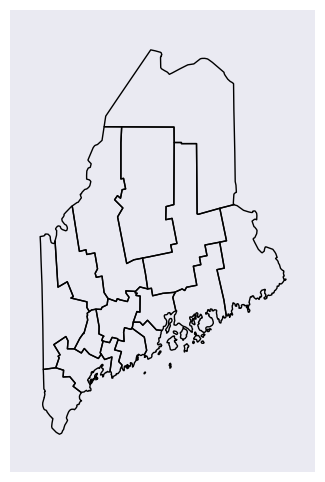

In [12]:
gplt.polyplot(mc, projection=gcrs.AlbersEqualArea())



In [13]:
dt = pd.read_csv("reformated_data.csv", index_col=False)
dt

,county,fair,year,apple_type,apple_totals
0,Knox,Knox Co.,1867,Pearmain,2
1,Knox,Knox Co.,1867,Porter,2
2,Knox,Knox Co.,1869,(Pear) Flemish Beauty,6
3,Knox,Knox Co.,1869,Baldwin,6
4,Knox,Knox Co.,1869,Fall Pippin,6
...,...,...,...,...,...
25620,Lincoln,Nobleboro,1921,Sweet Russet,30
25621,Lincoln,Nobleboro,1921,Tolman sweet,30
25622,Lincoln,Nobleboro,1921,Wealthy,30
25623,Lincoln,Nobleboro,1921,Wolf River,30


In [16]:
d = dt.merge(a, on="county", how="left")
d

,county,fair,year,apple_type,apple_totals,geometry
0,Knox,Knox Co.,1867,Pearmain,2,None
1,Knox,Knox Co.,1867,Porter,2,None
2,Knox,Knox Co.,1869,(Pear) Flemish Beauty,6,None
3,Knox,Knox Co.,1869,Baldwin,6,None
4,Knox,Knox Co.,1869,Fall Pippin,6,None
...,...,...,...,...,...,...
25620,Lincoln,Nobleboro,1921,Sweet Russet,30,None
25621,Lincoln,Nobleboro,1921,Tolman sweet,30,None
25622,Lincoln,Nobleboro,1921,Wealthy,30,None
25623,Lincoln,Nobleboro,1921,Wolf River,30,None


In [18]:
d.head()

,county,fair,year,apple_type,apple_totals,geometry
0,Knox,Knox Co.,1867,Pearmain,2,None
1,Knox,Knox Co.,1867,Porter,2,None
2,Knox,Knox Co.,1869,(Pear) Flemish Beauty,6,None
3,Knox,Knox Co.,1869,Baldwin,6,None
4,Knox,Knox Co.,1869,Fall Pippin,6,None
